No handles with labels found to put in legend.


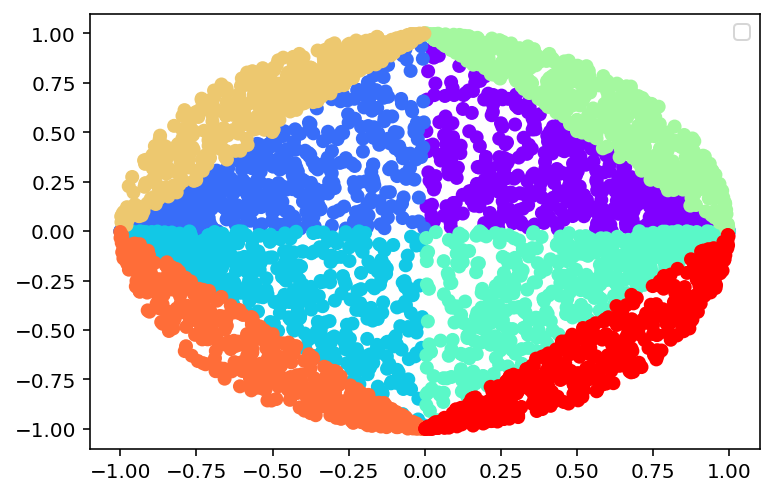

In [ ]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# example of making predictions for a regression problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

import random
from math import sqrt

def generate_c1(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1 - x)
        points.append([x, y, 0])
    return points

def generate_c2(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(-1, 0)
        y = random.uniform(0, x + 1)
        points.append([x, y, 1])
    return points

def generate_c3(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(-1, 0)
        y = random.uniform(-1-x, 0)
        points.append([x, y, 2])
    return points

def generate_c4(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(0, 1)
        y = random.uniform(-1+x, 0)
        points.append([x, y, 3])
    return points

def generate_c5(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(0, 1)
        y = random.uniform(1 - x, sqrt(1 - x**2))
        points.append([x, y, 4])
    return points

def generate_c6(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(-1, 0)
        y = random.uniform(x+1, sqrt(1 - x**2))
        points.append([x, y, 5])
    return points

def generate_c7(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(-1, 0)
        y = random.uniform(-sqrt(1 - x**2), -1-x)
        points.append([x, y, 6])
    return points

def generate_c8(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(0, 1)
        y = random.uniform(-sqrt(1 - x**2), -1+x)
        points.append([x, y, 7])
    return points

def generate(num_instances):
    points = generate_c1(num_instances) + generate_c2(num_instances) + generate_c3(num_instances) + generate_c4(num_instances) + generate_c5(num_instances) + generate_c6(num_instances) + generate_c7(num_instances) + generate_c8(num_instances)
    return points

def one_hot_encode(x):
    one_hot = np.zeros([len(x), 8])
    for i in enumerate(x):
        one_hot[(i[0], i[1])] = 1
    return one_hot

colors = cm.rainbow(np.linspace(0, 1, 8))

res = generate(500)

data_X = [[row[0], row[1]] for row in res]
data_X = np.array(data_X)
data_y = [row[2] for row in res]
data_y = np.array(data_y)

plt.scatter(data_X[:,0], data_X[:,1], color=colors[data_y])

plt.legend()
_ = plt.ylim()

y = one_hot_encode(data_y)

X_train, X_test, y_train, y_test = train_test_split(data_X, y, test_size=0.33)

In [ ]:
X_train.shape, y_train.shape

((2680, 2), (2680, 8))

In [ ]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(8, input_dim=2,activation='hard_sigmoid'))

model.compile(optimizer='adam', loss='categorical_hinge', metrics=['acc', 'mse'])

history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_split=0.1)

Epoch 1/100
2412/2412 [==============================] - 2s 997us/step - loss: 1.0050 - acc: 0.3860 - mse: 0.2485 - val_loss: 0.9965 - val_acc: 0.4739 - val_mse: 0.2452
Epoch 2/100
2412/2412 [==============================] - 2s 939us/step - loss: 0.9864 - acc: 0.5485 - mse: 0.2370 - val_loss: 0.9852 - val_acc: 0.5075 - val_mse: 0.2302
Epoch 3/100
2412/2412 [==============================] - 2s 909us/step - loss: 0.9666 - acc: 0.5357 - mse: 0.2175 - val_loss: 0.9671 - val_acc: 0.5336 - val_mse: 0.2096
Epoch 4/100
2412/2412 [==============================] - 2s 948us/step - loss: 0.9410 - acc: 0.5381 - mse: 0.1944 - val_loss: 0.9502 - val_acc: 0.5187 - val_mse: 0.1876
Epoch 5/100
2412/2412 [==============================] - 2s 907us/step - loss: 0.9128 - acc: 0.5551 - mse: 0.1703 - val_loss: 0.9272 - val_acc: 0.5112 - val_mse: 0.1604
Epoch 6/100
2412/2412 [==============================] - 2s 908us/step - loss: 0.8820 - acc: 0.5709 - mse: 0.1448 - val_loss: 0.9036 - val_acc: 0.5410 - va

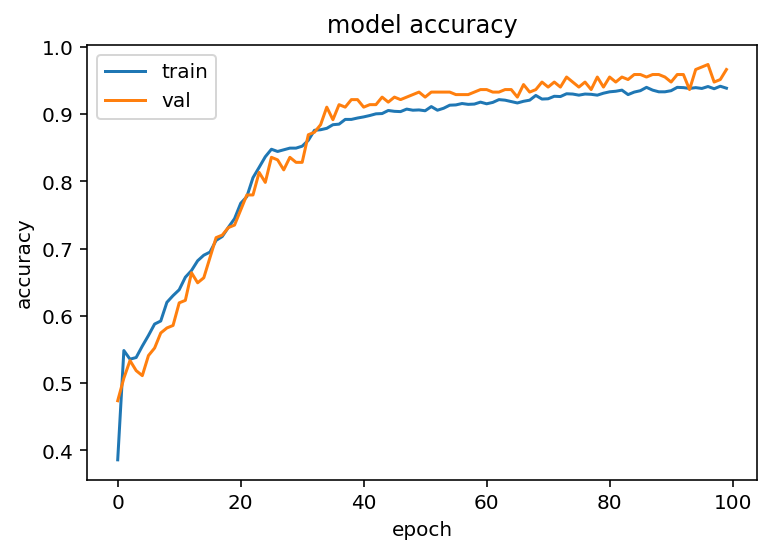

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

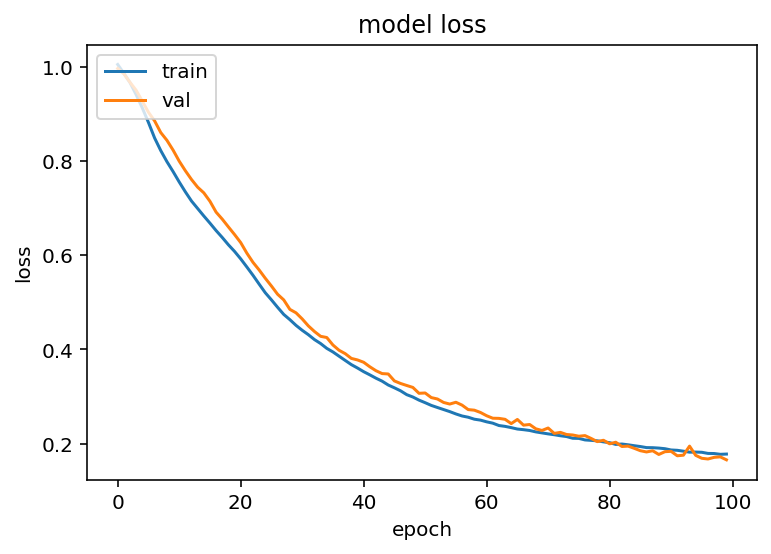

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Accuracy on training data: 0.9380596876144409% 
 Error on training data: 0.06194031238555908
Accuracy on test data: 0.9378787875175476% 
 Error on test data: 0.06212121248245239


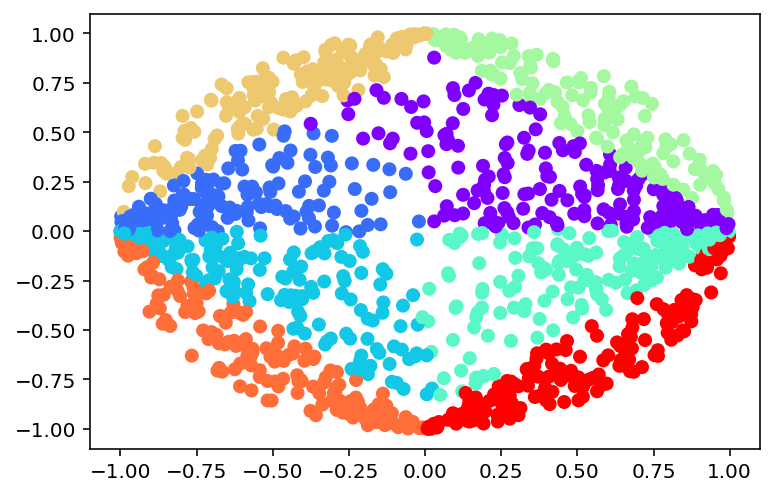

In [ ]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

predicted = [np.argmax(point) for point in pred_test ]

plt.scatter(X_test[:,0], X_test[:,1], color=colors[predicted])
_ = plt.ylim()

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test.argmax(axis=1), pred_test.argmax(axis=1))

array([[164,   0,   0,   3,   4,   0,   0,   0],
       [ 16, 131,   2,   0,   0,   6,   0,   0],
       [  0,   2, 158,   1,   0,   0,   7,   0],
       [  0,   0,   3, 163,   0,   0,   0,   4],
       [  7,   0,   0,   0, 138,   2,   0,   0],
       [  0,  19,   0,   0,   0, 159,   0,   0],
       [  0,   0,   3,   0,   0,   0, 154,   0],
       [  0,   0,   0,   3,   0,   0,   0, 171]])